In [2]:
install.packages("tidyr")
install.packages("psych")

library("psych")
library("tidyr")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [3]:
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




##wczytanie danych

In [4]:
dane <- read.csv2("/content/ceny_produktow_rolniczych.csv")
dane <- dane %>% select(-X, -Okresy, -Rok)

In [5]:
names(dane) <- c("jeczmien", "pszenzyto", "owies", "kukurydza", "bydlo", "mleko")

In [6]:
str(dane)

'data.frame':	84 obs. of  6 variables:
 $ jeczmien : num  67.6 67.3 67.1 67.3 66.2 ...
 $ pszenzyto: num  62.1 61.4 61.9 62.4 62.4 ...
 $ owies    : num  52 52.3 51.9 51.9 53.3 ...
 $ kukurydza: num  59.6 60.5 61.8 62.4 64.8 ...
 $ bydlo    : num  6.58 6.47 6.34 6.58 6.63 6.49 6.42 6.52 6.48 6.51 ...
 $ mleko    : num  142 135 134 132 129 ...


### określenie zbiorów

In [7]:
trening = dane[1:67,]
test = dane[68:83,]

In [8]:
head(trening)

,jeczmien,pszenzyto,owies,kukurydza,bydlo,mleko
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67.59,62.06,52.01,59.65,6.58,142.12
2,67.33,61.37,52.29,60.46,6.47,135.24
3,67.08,61.86,51.87,61.81,6.34,134.20
4,67.35,62.37,51.85,62.35,6.58,132.17
5,66.19,62.44,53.30,64.78,6.63,129.20
6,65.47,63.72,54.41,67.09,6.49,128.52


## wybór zmiennych objaśniających

Idea doboru zmiennych objaśniających:

• możliwie silnie skorelowane ze zmienną objaśnianą (y)

• możliwie słabo skorelowane między sobą

In [15]:
mleko = trening$mleko
jeczmien = trening$jeczmien
pszenzyto = trening$pszenzyto
owies= trening$owies
kukurydza = trening$kukurydza
bydlo = trening$bydlo

In [16]:
cor(mleko, jeczmien)
cor(mleko, pszenzyto)
cor(mleko, owies)
cor(mleko, kukurydza)
cor(mleko, bydlo)

[1] 0.9163924

[1] 0.9145515

[1] 0.9547032

[1] 0.8525274

[1] 0.9444775

## wykresy korelacji zmiennych objaśniających

### jeczmien


	Pearson's product-moment correlation

data:  mleko and jeczmien
t = 18.458, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8670416 0.9479362
sample estimates:
      cor 
0.9163924 


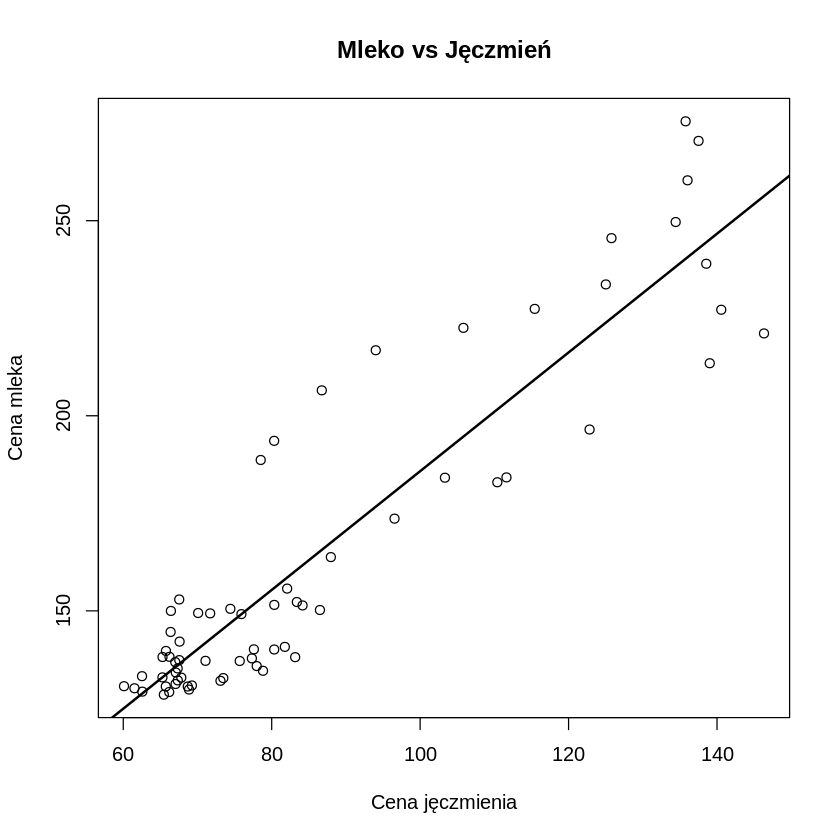

In [21]:
# Mleko vs Jęczmień
plot(jeczmien, mleko,
     main = "Mleko vs Jęczmień",
     xlab = "Cena jęczmienia", ylab = "Cena mleka")
abline(lm(mleko ~ jeczmien), col = "black", lwd = 2)

cor.test(mleko, jeczmien)

### Pszenzyto


	Pearson's product-moment correlation

data:  mleko and pszenzyto
t = 18.23, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8641911 0.9467706
sample estimates:
      cor 
0.9145515 


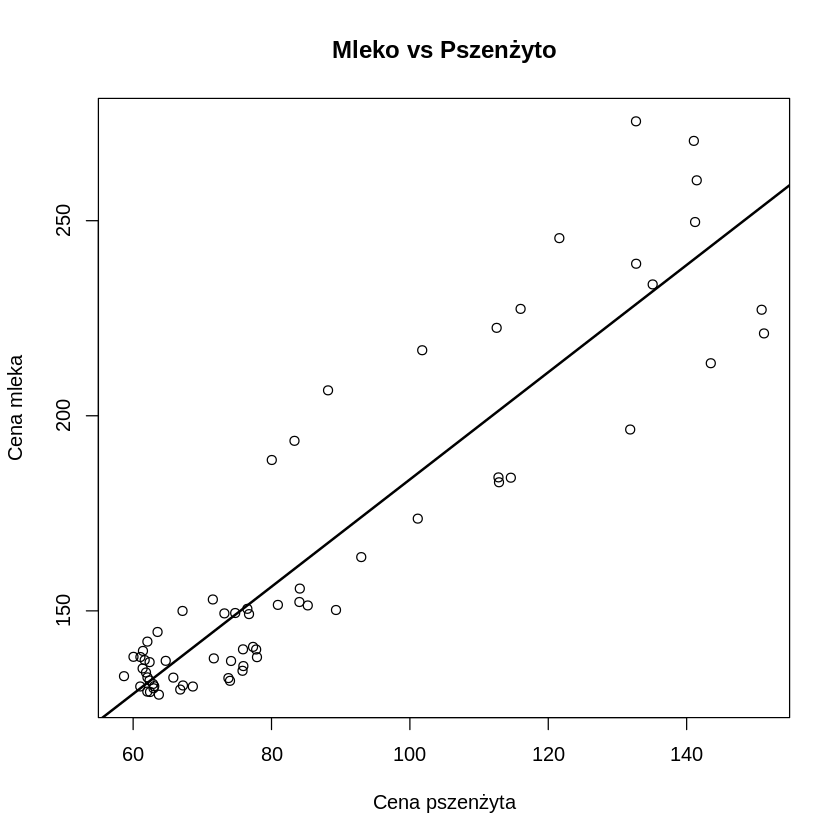

In [23]:
# Mleko vs Pszenżyto
plot(pszenzyto, mleko,
     main = "Mleko vs Pszenżyto",
     xlab = "Cena pszenżyta", ylab = "Cena mleka")
abline(lm(mleko ~ pszenzyto), col = "black", lwd = 2)
cor.test(mleko, pszenzyto)

### Owies


	Pearson's product-moment correlation

data:  mleko and owies
t = 25.867, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9271059 0.9720041
sample estimates:
      cor 
0.9547032 


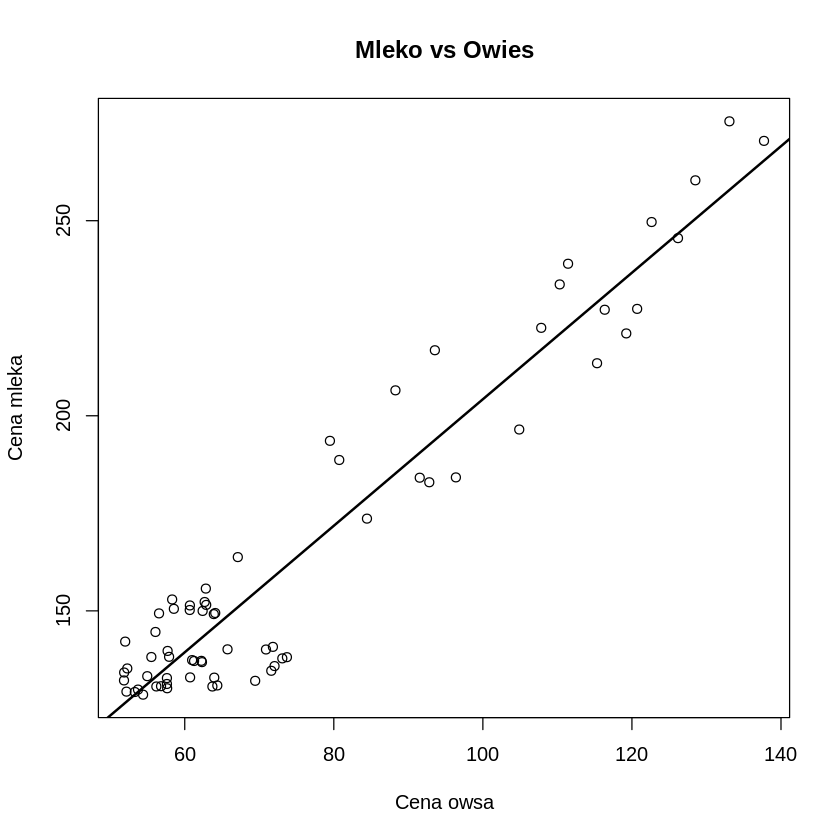

In [24]:
# Mleko vs Owies
plot(owies, mleko,
     main = "Mleko vs Owies",
     xlab = "Cena owsa", ylab = "Cena mleka")
abline(lm(mleko ~ owies), col = "black", lwd = 2)

cor.test(mleko, owies)

### Kukurydza


	Pearson's product-moment correlation

data:  mleko and kukurydza
t = 13.15, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7700036 0.9069972
sample estimates:
      cor 
0.8525274 


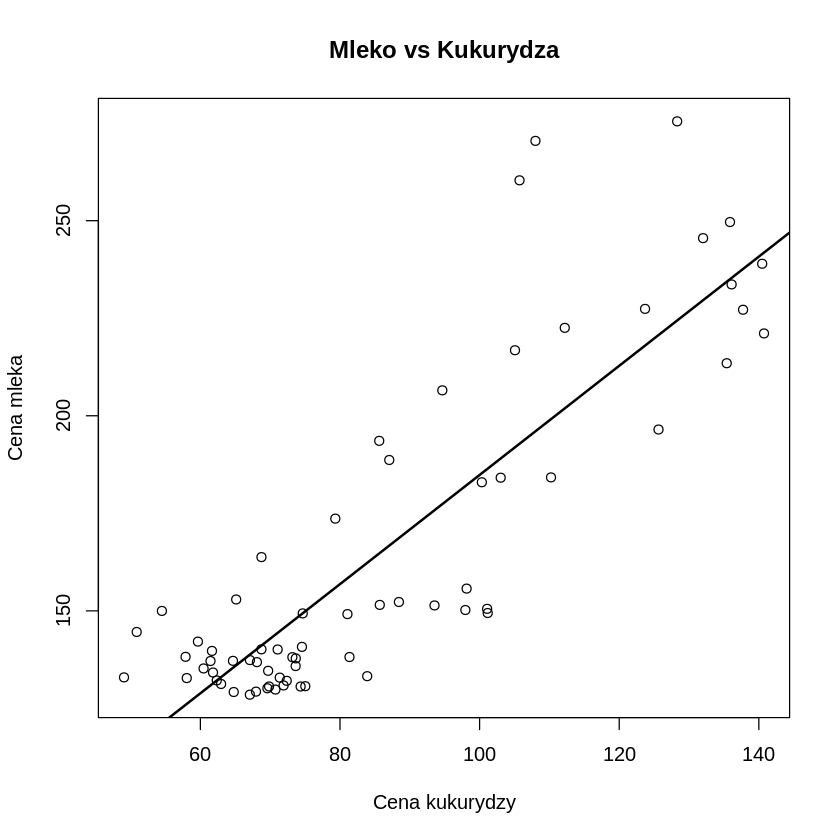

In [25]:
# Mleko vs Kukurydza
plot(kukurydza, mleko,
     main = "Mleko vs Kukurydza",
     xlab = "Cena kukurydzy", ylab = "Cena mleka")
abline(lm(mleko ~ kukurydza), col = "black", lwd = 2)

cor.test(mleko, kukurydza)

### Bydlo


	Pearson's product-moment correlation

data:  mleko and bydlo
t = 23.175, df = 65, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9109340 0.9656154
sample estimates:
      cor 
0.9444775 


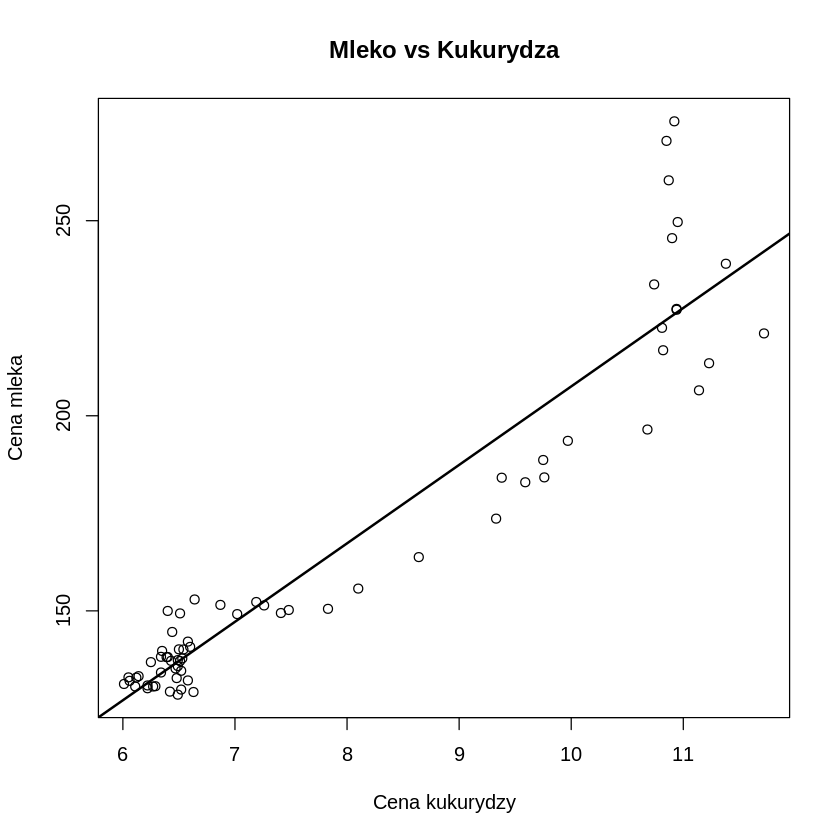

In [26]:
# Mleko vs bydlo
plot(bydlo, mleko,
     main = "Mleko vs Kukurydza",
     xlab = "Cena kukurydzy", ylab = "Cena mleka")
abline(lm(mleko ~ bydlo), col = "black", lwd = 2)

cor.test(mleko, bydlo)